In [1]:
import pandas as pd
import numpy as np

In [113]:
tm_stats = pd.read_excel('team_stats.xlsx', sheet_name='stats')

In [121]:
tm_stats.head()

,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,marg_vic,cov_sprd,PA,SoS,OSRS,DSRS,win_pct
0,Cardinals,12,343,28.6,1490,124.2,2935,244.6,4425,368.8,9.9,6.6,224,-1.2,5.5,3.2,0.833
1,Falcons,12,216,18.0,1056,88.0,2739,228.2,3795,316.2,-9.7,-6.5,332,0.5,-4.9,-4.3,0.417
2,Ravens,12,282,23.5,1765,147.1,2890,240.8,4655,387.9,1.8,-2.0,260,-1.2,0.0,0.7,0.667
3,Bills,12,336,28.0,1400,116.7,3112,259.3,4512,376.0,11.7,3.4,196,-1.8,4.5,5.4,0.583
4,Panthers,12,236,19.7,1335,111.2,2369,197.4,3704,308.7,-1.4,-1.3,253,-0.9,-3.7,1.4,0.417


In [115]:
X = tm_stats.drop(['win_pct'], axis=1)
y = tm_stats.win_pct

In [116]:
X.head()

,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,marg_vic,cov_sprd,PA,SoS,OSRS,DSRS
0,Cardinals,12,343,28.6,1490,124.2,2935,244.6,4425,368.8,9.9,6.6,224,-1.2,5.5,3.2
1,Falcons,12,216,18.0,1056,88.0,2739,228.2,3795,316.2,-9.7,-6.5,332,0.5,-4.9,-4.3
2,Ravens,12,282,23.5,1765,147.1,2890,240.8,4655,387.9,1.8,-2.0,260,-1.2,0.0,0.7
3,Bills,12,336,28.0,1400,116.7,3112,259.3,4512,376.0,11.7,3.4,196,-1.8,4.5,5.4
4,Panthers,12,236,19.7,1335,111.2,2369,197.4,3704,308.7,-1.4,-1.3,253,-0.9,-3.7,1.4


In [117]:
y.head()

0    0.833
1    0.417
2    0.667
3    0.583
4    0.417
Name: win_pct, dtype: float64

In [67]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [69]:
ct = ColumnTransformer(transformers=[
    ('one-hot', OneHotEncoder(), [0])],
    remainder='passthrough')

enc_team = ct.fit_transform(X)
                       
#('scaler', StandardScaler())], 

In [81]:
enc_team

array([[ 0. ,  0. ,  0. , ..., -1.2,  5.5,  3.2],
       [ 0. ,  0. ,  0. , ...,  0.5, -4.9, -4.3],
       [ 0. ,  0. ,  0. , ..., -1.2,  0. ,  0.7],
       ...,
       [ 0. ,  0. ,  0. , ..., -0.2,  8.6,  0.1],
       [ 0. ,  0. ,  0. , ...,  1.5,  3.2, -0.5],
       [ 0. ,  0. ,  0. , ...,  1. , -1.4, -1.8]])

In [82]:
enc_x = X.drop(['team'], axis=1)

In [83]:
scaler = StandardScaler().fit(enc_x)
X_scaled = scaler.transform(enc_x)

# X_scaled['team'] = enc_team.tolist()
# X_scaled.head()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

ridge=Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [91]:
ridge.score(X_test, y_test)

0.5779900281742213

In [ ]:
alpha_list = {'alpha':[0.001,0.01,0.1,1,10]}

kf = KFold(n_splits=4)

for train_index, test_index in kf.split(X_scaled):
           
    to_train_x, to_test_x = X[train_index], X[test_index]
    to_train_y, to_test_y = y[train_index], y[test_index]
        
    X_train, X_test, y_train, y_test = train_test_split(to_train_x, to_train_y, random_state=0)
    ridge=Ridge()
    gscv = GridSearchCV(ridge, alpha_list, cv=2).fit(X_train, y_train)

    print(gscv.best_params_["alpha"])
    
    scores = []
    rdg = Ridge(alpha=10)
    rdg.fit(to_test_x, to_test_y)
    scores.append(rdg.score(to_test_x,to_test_y))

mean_test_score = np.mean(scores)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ct = ColumnTransformer(transformers=[
    ('one-hot', OneHotEncoder(), [0])], remainder='passthrough')

ridge_pipe = Pipeline([('preprocessing', ct), ('clf', Ridge())])

ridge_pipe.fit(X, y)
print("pipeline score: %.3f" % ridge_pipe.score(X_test, y_test))

pipeline score: 0.936


In [137]:
ridge_preds = ridge_pipe.predict(X)

In [138]:
ridge_dataset = tm_stats.copy()
ridge_dataset['preds'] = ridge_preds
ridge_dataset.head()

,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,marg_vic,cov_sprd,PA,SoS,OSRS,DSRS,win_pct,preds
0,Cardinals,12,343,28.6,1490,124.2,2935,244.6,4425,368.8,9.9,6.6,224,-1.2,5.5,3.2,0.833,0.770155
1,Falcons,12,216,18.0,1056,88.0,2739,228.2,3795,316.2,-9.7,-6.5,332,0.5,-4.9,-4.3,0.417,0.355427
2,Ravens,12,282,23.5,1765,147.1,2890,240.8,4655,387.9,1.8,-2.0,260,-1.2,0.0,0.7,0.667,0.627471
3,Bills,12,336,28.0,1400,116.7,3112,259.3,4512,376.0,11.7,3.4,196,-1.8,4.5,5.4,0.583,0.674462
4,Panthers,12,236,19.7,1335,111.2,2369,197.4,3704,308.7,-1.4,-1.3,253,-0.9,-3.7,1.4,0.417,0.424227


In [139]:
from sklearn.linear_model import LinearRegression

temp_x = X.drop(['team'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(temp_x, y, random_state=0)

lin_pipe = Pipeline([('scale', StandardScaler()), ('clf', LinearRegression())])
lin_pipe.fit(X_train, y_train)
print("pipeline score: %.3f" % lin_pipe.score(X_test, y_test))

pipeline score: 0.530


Text(0, 0.5, 'Win Percentage')

<Figure size 1008x720 with 0 Axes>

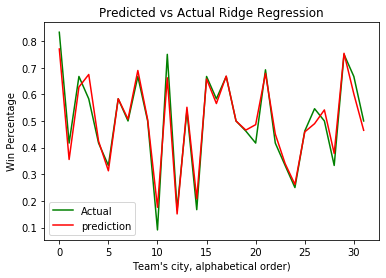

In [167]:
import seaborn as se 
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
fig, ax = plt.subplots()
plt.plot(ridge_dataset['win_pct'], color = "green")
plt.plot(ridge_dataset['preds'], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs Actual Ridge Regression")
# labels = list(lin_dataset.team)
# ax.set_xticklabels(labels)
# plt.xticks(rotation=90)
# plt.locator_params(axis='x', nbins=10)
plt.xlabel("Team's city, alphabetical order)")
plt.ylabel("Win Percentage")

In [149]:
from sklearn.metrics import r2_score

lin_preds = lin_pipe.predict(temp_x)

In [151]:
lin_dataset = tm_stats.copy()
lin_dataset['preds'] = lin_preds
lin_dataset.head()

,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,marg_vic,cov_sprd,PA,SoS,OSRS,DSRS,win_pct,preds
0,Cardinals,12,343,28.6,1490,124.2,2935,244.6,4425,368.8,9.9,6.6,224,-1.2,5.5,3.2,0.833,0.683865
1,Falcons,12,216,18.0,1056,88.0,2739,228.2,3795,316.2,-9.7,-6.5,332,0.5,-4.9,-4.3,0.417,0.328944
2,Ravens,12,282,23.5,1765,147.1,2890,240.8,4655,387.9,1.8,-2.0,260,-1.2,0.0,0.7,0.667,0.568518
3,Bills,12,336,28.0,1400,116.7,3112,259.3,4512,376.0,11.7,3.4,196,-1.8,4.5,5.4,0.583,0.693770
4,Panthers,12,236,19.7,1335,111.2,2369,197.4,3704,308.7,-1.4,-1.3,253,-0.9,-3.7,1.4,0.417,0.453442


Text(0, 0.5, 'Win Percentage')

<Figure size 1008x720 with 0 Axes>

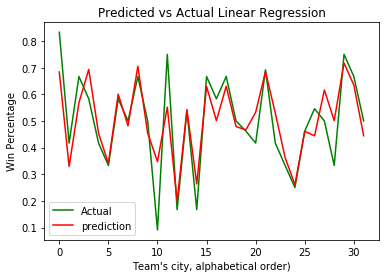

In [168]:
plt.figure(figsize=(14,10))
fig, ax = plt.subplots()
plt.plot(lin_dataset['win_pct'], color = "green")
plt.plot(lin_dataset['preds'], color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs Actual Linear Regression")
# labels = list(lin_dataset.team)
# ax.set_xticklabels(labels)
# plt.xticks(rotation=90)
# plt.locator_params(axis='x', nbins=10)
plt.xlabel("Team's city, alphabetical order)")
plt.ylabel("Win Percentage")

#https://stackoverflow.com/questions/60694853/how-to-use-a-3rd-dataframe-column-as-x-axis-ticks-labels-in-matplotlib-scatter

In [181]:
#new_df = tm_stats.pivot_table(tm_stats,values= ['games','tot_pnts','pts_gm','rush_yds','ryd_gm','pass_yds','pyds_gm','tot_yds','yds_gm','marg_vic','cov_sprd','PA','SoS','OSRS','DSRS','win_pct'], index=tm_stats.index, columns='team', aggfunc='first')

In [ ]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 4, figsize=(20, 4))

for this_C, subplot in zip([0.00001, 1, 100, 1000], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

In [184]:
nflodds = pd.read_excel('nflodds.xlsx', sheet_name='outcomes').dropna().reset_index()
nflodds.head()

,index,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,marg_vic,cov_sprd,PA,SoS,OSRS,DSRS,win_pct,outcome
0,0,Ravens,12.0,282.0,23.5,1765.0,147.1,2890.0,240.8,4655.0,387.9,1.8,-2.0,260.0,-1.2,0.0,0.7,0.667,0.0
1,1,Steelers,12.0,244.0,20.3,1043.0,86.9,2859.0,238.2,3902.0,325.2,-3.5,-2.9,286.0,-0.2,-2.1,-1.6,0.546,1.0
2,3,49ers,12.0,303.0,25.2,1511.0,125.9,2870.0,239.2,4381.0,365.1,2.1,-0.9,278.0,0.7,3.0,-0.3,0.500,0.0
3,4,Seahawks,12.0,239.0,19.9,1164.0,97.0,2416.0,201.3,3580.0,298.3,-0.8,-0.8,249.0,1.3,-3.2,3.7,0.333,1.0
4,6,Raiders,12.0,274.0,22.8,1056.0,88.0,3496.0,291.3,4552.0,379.3,-0.1,-0.9,312.0,-0.2,0.1,-3.5,0.583,0.0


In [188]:
nflodds = nflodds.drop(columns=['index'])

In [189]:
nflodds.head()

,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,marg_vic,cov_sprd,PA,SoS,OSRS,DSRS,win_pct,outcome
0,Ravens,12.0,282.0,23.5,1765.0,147.1,2890.0,240.8,4655.0,387.9,1.8,-2.0,260.0,-1.2,0.0,0.7,0.667,0.0
1,Steelers,12.0,244.0,20.3,1043.0,86.9,2859.0,238.2,3902.0,325.2,-3.5,-2.9,286.0,-0.2,-2.1,-1.6,0.546,1.0
2,49ers,12.0,303.0,25.2,1511.0,125.9,2870.0,239.2,4381.0,365.1,2.1,-0.9,278.0,0.7,3.0,-0.3,0.500,0.0
3,Seahawks,12.0,239.0,19.9,1164.0,97.0,2416.0,201.3,3580.0,298.3,-0.8,-0.8,249.0,1.3,-3.2,3.7,0.333,1.0
4,Raiders,12.0,274.0,22.8,1056.0,88.0,3496.0,291.3,4552.0,379.3,-0.1,-0.9,312.0,-0.2,0.1,-3.5,0.583,0.0


In [190]:
evens = nflodds.iloc[::2, :]
evens

,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,marg_vic,cov_sprd,PA,SoS,OSRS,DSRS,win_pct,outcome
0,Ravens,12.0,282.0,23.5,1765.0,147.1,2890.0,240.8,4655.0,387.9,1.8,-2.0,260.0,-1.2,0.0,0.7,0.667,0.0
2,49ers,12.0,303.0,25.2,1511.0,125.9,2870.0,239.2,4381.0,365.1,2.1,-0.9,278.0,0.7,3.0,-0.3,0.500,0.0
4,Raiders,12.0,274.0,22.8,1056.0,88.0,3496.0,291.3,4552.0,379.3,-0.1,-0.9,312.0,-0.2,0.1,-3.5,0.583,0.0
6,Jaguars,12.0,180.0,15.0,1327.0,110.6,2421.0,201.8,3748.0,312.3,-11.7,-5.4,320.0,1.0,-7.3,-3.4,0.167,0.0
8,Falcons,12.0,216.0,18.0,1056.0,88.0,2739.0,228.2,3795.0,316.2,-9.7,-6.5,332.0,0.5,-4.9,-4.3,0.417,0.0
10,Cardinals,12.0,343.0,28.6,1490.0,124.2,2935.0,244.6,4425.0,368.8,9.9,6.6,224.0,-1.2,5.5,3.2,0.833,1.0
12,Bengals,12.0,331.0,27.6,1327.0,110.6,2940.0,245.0,4267.0,355.6,5.3,4.0,267.0,-3.7,2.8,-1.2,0.583,0.0
14,Lions,12.0,203.0,16.9,1318.0,109.8,2413.0,201.1,3731.0,310.9,-9.4,-1.6,316.0,-0.1,-6.3,-3.2,0.091,1.0
16,Texans,12.0,164.0,13.7,945.0,78.8,2109.0,175.8,3054.0,254.5,-13.3,-3.1,323.0,1.5,-8.7,-3.0,0.167,0.0
18,Dolphins,13.0,254.0,19.5,1030.0,79.2,2997.0,230.5,4027.0,309.8,-2.6,-0.3,288.0,-0.6,-3.4,0.1,0.462,1.0


In [192]:
odds = nflodds.iloc[1::2,:]
odds

,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,marg_vic,cov_sprd,PA,SoS,OSRS,DSRS,win_pct,outcome
1,Steelers,12.0,244.0,20.3,1043.0,86.9,2859.0,238.2,3902.0,325.2,-3.5,-2.9,286.0,-0.2,-2.1,-1.6,0.546,1.0
3,Seahawks,12.0,239.0,19.9,1164.0,97.0,2416.0,201.3,3580.0,298.3,-0.8,-0.8,249.0,1.3,-3.2,3.7,0.333,1.0
5,Washington,12.0,246.0,20.5,1493.0,124.4,2654.0,221.2,4147.0,345.6,-4.3,-1.2,297.0,1.0,-1.4,-1.8,0.500,1.0
7,Rams,12.0,336.0,28.0,1175.0,97.9,3468.0,289.0,4643.0,386.9,-3.2,-2.0,270.0,-0.9,5.2,-0.6,0.500,1.0
9,Buccaneers,12.0,377.0,31.4,1111.0,92.6,3733.0,311.1,4844.0,403.7,8.9,0.7,270.0,-0.2,8.6,0.1,0.750,1.0
11,Bears,12.0,201.0,16.8,1501.0,125.1,2085.0,173.8,3586.0,298.8,-7.2,-2.8,287.0,0.3,-6.7,-0.2,0.333,0.0
13,Chargers,12.0,314.0,26.2,1212.0,101.0,3373.0,281.1,4585.0,382.1,5.5,-1.6,315.0,1.4,3.8,-2.4,0.667,1.0
15,Vikings,12.0,308.0,25.7,1359.0,113.2,3260.0,271.7,4619.0,384.9,0.3,-0.2,305.0,0.4,3.1,-2.4,0.417,0.0
17,Colts,13.0,371.0,28.5,1972.0,151.7,2813.0,216.4,4785.0,368.1,6.8,6.0,283.0,-1.3,4.9,0.6,0.539,1.0
19,Giants,12.0,211.0,17.6,1090.0,90.8,2652.0,221.0,3742.0,311.8,-5.2,0.2,273.0,0.8,-5.3,0.9,0.333,0.0


In [194]:
#pd.DataFrame(np.rec.fromarrays((a.values, b.values)).tolist(), 
#                       columns=a.columns,
#                       index=a.index)

# https://stackoverflow.com/questions/41908655/create-pandas-dataframe-with-each-element-a-tuple-created-from-other-dataframes

In [281]:
from sklearn.svm import LinearSVC

svc_x = nflodds.drop(columns=['outcome', 'team'])
svc_y = nflodds.outcome
this_c = [0.00001, .001, .01, 1, 100, 1000]
X_train, X_test, y_train, y_test = train_test_split(svc_x, svc_y, random_state = 0)
X_scaled = StandardScaler().fit_transform(X_train)

for c in this_c:
    scaled_svc = LinearSVC(C=c,max_iter=50000).fit(X_scaled, y_train)
    unscaled_svc = LinearSVC(C=c,max_iter=50000).fit(X_train, y_train)
    
    print("Scaled score for " + str(c) + ": %.3f" % scaled_svc.score(X_test, y_test))
    print("Unscaled score for " + str(c) + " %.3f" % unscaled_svc.score(X_test, y_test))
    
#     svc_pipe = Pipeline([('preprocessing', ct), ('clf', LinearSVC(C=c))])
#     svc_pipe.fit(svc_x, svc_y)
#     svcpred = svc_pipe.predict(svc_x)
#     print(svcpred)
    #print("pipeline score: %.3f" % svc_pipe.score(svcpred, svc_y))
    
#     ct.fit_transform(X_train)
#     lin = LinearSVC(C=c).fit(X_train, y_train)

#     scores = []
#     rdg = Ridge(alpha=10)
#     #rdg.fit(to_test_x, to_test_y)
#     scores.append(lin.score(X_test,y_test))
#     print(scores)



Scaled score for 1e-05: 0.833
Unscaled score for 1e-05 0.333
Scaled score for 0.001: 0.833
Unscaled score for 0.001 0.500
Scaled score for 0.01: 0.833
Unscaled score for 0.01 0.500
Scaled score for 1: 0.167
Unscaled score for 1 0.333
Scaled score for 100: 0.167


C:\Users\chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Unscaled score for 100 0.333
Scaled score for 1000: 0.167
Unscaled score for 1000 0.500


C:\Users\chris\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [282]:
svc = LinearSVC(C=.001).fit(X_scaled, y_train)
print(svc.score(X_test, y_test))
svcpred_stanscal = svc.predict(svc_x)

0.8333333333333334


In [283]:
X_minmax_scaled = StandardScaler().fit_transform(X_train)
svc = LinearSVC(C=.01).fit(X_minmax_scaled, y_train)
print(svc.score(X_test, y_test))
svcpred_minmaxscal = svc.predict(svc_x)

0.8333333333333334


In [284]:
nflodds["svc_predicted_stanscal"] = svcpred_stanscal
nflodds["svc_predicted_minmaxscal"] = svcpred_minmaxscal

In [286]:
nflodds

,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,...,PA,SoS,OSRS,DSRS,win_pct,outcome,svc_predicted,svc_predicted_stanscal,svc_predicted_minmaxscal,logcv_predicted
0,Ravens,12.0,282.0,23.5,1765.0,147.1,2890.0,240.8,4655.0,387.9,...,260.0,-1.2,0.0,0.7,0.667,0.0,1.0,1.0,1.0,1.0
1,Steelers,12.0,244.0,20.3,1043.0,86.9,2859.0,238.2,3902.0,325.2,...,286.0,-0.2,-2.1,-1.6,0.546,1.0,1.0,1.0,1.0,1.0
2,49ers,12.0,303.0,25.2,1511.0,125.9,2870.0,239.2,4381.0,365.1,...,278.0,0.7,3.0,-0.3,0.500,0.0,1.0,1.0,1.0,1.0
3,Seahawks,12.0,239.0,19.9,1164.0,97.0,2416.0,201.3,3580.0,298.3,...,249.0,1.3,-3.2,3.7,0.333,1.0,1.0,1.0,1.0,1.0
4,Raiders,12.0,274.0,22.8,1056.0,88.0,3496.0,291.3,4552.0,379.3,...,312.0,-0.2,0.1,-3.5,0.583,0.0,1.0,1.0,1.0,1.0
5,Washington,12.0,246.0,20.5,1493.0,124.4,2654.0,221.2,4147.0,345.6,...,297.0,1.0,-1.4,-1.8,0.500,1.0,1.0,1.0,1.0,1.0
6,Jaguars,12.0,180.0,15.0,1327.0,110.6,2421.0,201.8,3748.0,312.3,...,320.0,1.0,-7.3,-3.4,0.167,0.0,1.0,1.0,1.0,1.0
7,Rams,12.0,336.0,28.0,1175.0,97.9,3468.0,289.0,4643.0,386.9,...,270.0,-0.9,5.2,-0.6,0.500,1.0,1.0,1.0,1.0,1.0
8,Falcons,12.0,216.0,18.0,1056.0,88.0,2739.0,228.2,3795.0,316.2,...,332.0,0.5,-4.9,-4.3,0.417,0.0,1.0,1.0,1.0,1.0
9,Buccaneers,12.0,377.0,31.4,1111.0,92.6,3733.0,311.1,4844.0,403.7,...,270.0,-0.2,8.6,0.1,0.750,1.0,1.0,1.0,1.0,1.0


In [287]:
from sklearn.linear_model import LogisticRegressionCV

logcv = LogisticRegressionCV(cv=4, random_state=0).fit(X_scaled, y_train)
logcv_pred = logcv.predict(svc_x)
logcv.score(X_test, y_test)

0.8333333333333334

In [288]:
nflodds["logcv_predicted"] = logcv_pred
nflodds

,team,games,tot_pnts,pts_gm,rush_yds,ryd_gm,pass_yds,pyds_gm,tot_yds,yds_gm,...,PA,SoS,OSRS,DSRS,win_pct,outcome,svc_predicted,svc_predicted_stanscal,svc_predicted_minmaxscal,logcv_predicted
0,Ravens,12.0,282.0,23.5,1765.0,147.1,2890.0,240.8,4655.0,387.9,...,260.0,-1.2,0.0,0.7,0.667,0.0,1.0,1.0,1.0,1.0
1,Steelers,12.0,244.0,20.3,1043.0,86.9,2859.0,238.2,3902.0,325.2,...,286.0,-0.2,-2.1,-1.6,0.546,1.0,1.0,1.0,1.0,1.0
2,49ers,12.0,303.0,25.2,1511.0,125.9,2870.0,239.2,4381.0,365.1,...,278.0,0.7,3.0,-0.3,0.500,0.0,1.0,1.0,1.0,1.0
3,Seahawks,12.0,239.0,19.9,1164.0,97.0,2416.0,201.3,3580.0,298.3,...,249.0,1.3,-3.2,3.7,0.333,1.0,1.0,1.0,1.0,1.0
4,Raiders,12.0,274.0,22.8,1056.0,88.0,3496.0,291.3,4552.0,379.3,...,312.0,-0.2,0.1,-3.5,0.583,0.0,1.0,1.0,1.0,1.0
5,Washington,12.0,246.0,20.5,1493.0,124.4,2654.0,221.2,4147.0,345.6,...,297.0,1.0,-1.4,-1.8,0.500,1.0,1.0,1.0,1.0,1.0
6,Jaguars,12.0,180.0,15.0,1327.0,110.6,2421.0,201.8,3748.0,312.3,...,320.0,1.0,-7.3,-3.4,0.167,0.0,1.0,1.0,1.0,1.0
7,Rams,12.0,336.0,28.0,1175.0,97.9,3468.0,289.0,4643.0,386.9,...,270.0,-0.9,5.2,-0.6,0.500,1.0,1.0,1.0,1.0,1.0
8,Falcons,12.0,216.0,18.0,1056.0,88.0,2739.0,228.2,3795.0,316.2,...,332.0,0.5,-4.9,-4.3,0.417,0.0,1.0,1.0,1.0,1.0
9,Buccaneers,12.0,377.0,31.4,1111.0,92.6,3733.0,311.1,4844.0,403.7,...,270.0,-0.2,8.6,0.1,0.750,1.0,1.0,1.0,1.0,1.0
